In [2]:
import csv
import datetime
import os
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame

In [ ]:
"""
created the describe dataset, with mean SATD values per project
"""

input_folder = "data/aggregated_satd"
files = os.listdir(input_folder)


def create_row(name: str, df: DataFrame):
    return [
        name,
        df["code|design-debt"].mean(),
        df["requirement-debt"].mean(),
        df["documentation-debt"].mean(),
        df["test-debt"].mean(),
        datetime.datetime.fromtimestamp(df["timestamp"].min())]


with open("data/describe.csv", mode="w") as file:
    writer = csv.writer(file)
    writer.writerow(
        ["project", "mean-code|design-debt", "mean-requirement-debt", "mean-documentation-debt", "mean-test-debt",
         "first-commit-at"])
    for file in files:
        name = file.split(".")[0].split("_")[0]
        df = pd.read_csv(f"{input_folder}/{file}")
        writer.writerow(create_row(name, df))


In [ ]:
df = (pd.read_csv("data/describe.csv"))

plt.bar(df["project"], df["mean-code|design-debt"], label="code|design-debt")
plt.bar(df["project"], df["mean-requirement-debt"], label="requirement-debt")
plt.bar(df["project"], df["mean-test-debt"], label="test-debt", color="green")
plt.bar(df["project"], df["mean-documentation-debt"], label="documentation-debt", color="red")
plt.xlabel("Project")
plt.ylabel("Mean SATD")
plt.legend()

plt.show()

In [ ]:
plt.xlabel("Project")
plt.ylabel("Mean SATD")
plt.bar(df["project"], df["mean-test-debt"], label="test-debt", color="green")
plt.bar(df["project"], df["mean-documentation-debt"], label="documentation-debt", color="red")
plt.legend()

plt.show()

In [ ]:
"""
Number of releases
"""

def plot_releases(name: str, df: DataFrame):
    df = df.sort_values(by=["timestamp"], ascending=True)
    df["count"] = 1
    plt.plot(df["timestamp"], df["count"].cumsum(), label=name.split("-")[0])


df = pd.read_csv("data/releases.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
projects = sorted(df["project"].unique())

for project in projects:
    plot_releases(project, df[df["project"] == project])

plt.legend()
plt.ylabel("Number of Releases")
plt.show()



In [ ]:
"""
Number of commits
"""

def plot_commits(name: str, df: DataFrame):
    df = df.sort_values(by=["timestamp"], ascending=True)
    df["count"] = 1
    plt.plot(df["timestamp"], df["count"].cumsum(), label=name.split("-")[0])


df = pd.read_csv("data/commits.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
projects = sorted(df["project"].unique())

for project in projects:
    plot_releases(project, df[df["project"] == project])

plt.legend()
plt.ylabel("Number of Commits")
plt.show()

druid & 4708 & 107 & 40 & 29
dubbo & 1147 & 694 & 71 & -2
flink & 3448 & 780 & 223 & 116
hadoop & 6798 & 1173 & 381 & 65
maven & 384 & 124 & 35 & -13
pulsar & 406 & 113 & 61 & 8


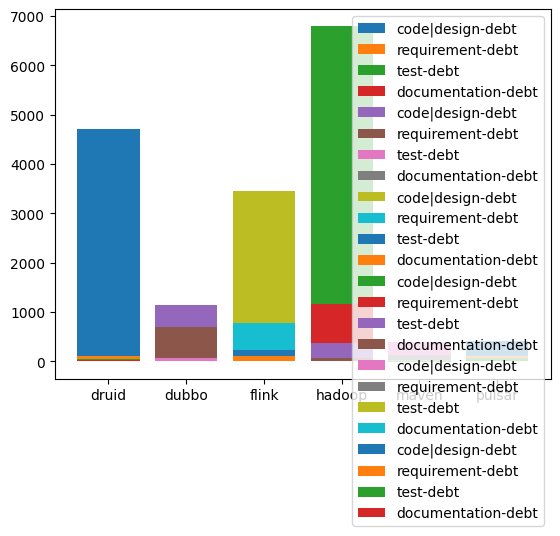

In [17]:
df = pd.read_csv("data/master-dataset.csv")

for project in df["project"].unique():
    project_df = df[df["project"] == project]
    
    plt.bar(project, project_df["code|design-debt"].sum(), label="code|design-debt")
    plt.bar(project, project_df["requirement-debt"].sum(), label="requirement-debt")
    plt.bar(project, project_df["test-debt"].sum(), label="test-debt")
    plt.bar(project, project_df["documentation-debt"].sum(), label="documentation-debt")
    
    print(" & ".join(str(x) for x in [
        project, 
        project_df["code|design-debt"].sum(), 
        project_df["requirement-debt"].sum(), 
        project_df["test-debt"].sum(), 
        project_df["documentation-debt"].sum()
    ]))
    
plt.legend()
plt.show()